### Cargamo la base de datos de imagenes con el csv (descripciones y etiquetas)

In [64]:
import pandas as pd
# Carga el archivo CSV en un DataFrame
data = pd.read_csv('train/_classes.csv')
data = data.rename(columns=lambda x: x.strip())
data.head(10)

,filename,with_mask,without_mask
0,26-with-mask_jpg.rf.fb2a4fd14461ba4e7d981f51d9...,1,0
1,66_jpg.rf.fb48333563aba0cd06afba343f625d98.jpg,0,1
2,153-with-mask_jpg.rf.fb584ce29ce6d9a3123a04d80...,1,0
3,29-with-mask_jpg.rf.fb9ecac8d3dc335a43b79a9438...,1,0
4,augmented_image_315_jpg.rf.fba9c25c6675c5a039f...,1,0
5,206-with-mask_jpg.rf.fbde45f841c286f89c7ab2e50...,1,0
6,335-with-mask_jpg.rf.fc16b052f3ff037c37b148ec8...,1,0
7,214-with-mask_jpg.rf.fc3f86d4d618349b63e1c7f5a...,1,0
8,augmented_image_307_jpg.rf.fc790a624316eb8e077...,0,1
9,98_jpg.rf.fc8c414c57b1b044d84baa211c1be0d3.jpg,0,1


In [65]:
#Columnas del dataset de imagenes
data.columns

Index(['filename', 'with_mask', 'without_mask'], dtype='object')

### Total de Imagenes del dataset

In [66]:
#Total de imagenes
data["filename"].count()

1279

In [67]:
data["filename"][0]

'26-with-mask_jpg.rf.fb2a4fd14461ba4e7d981f51d994136b.jpg'

### Cargamos la imagenes digitales(.jpg) en con una dimension de pixeles, y cada pixel en formato RGB(Colores)

In [68]:
# Cargar las librerias
import cv2
import numpy as np
import os

# Ruta de la carpeta que contiene las imágenes
imagenes_folder = 'train'

# Carga de las imágenes y almacenamiento en una lista
imagenes = []
for filename in data['filename']:
    # Construye la ruta completa de la imagen
    image_path = os.path.join(imagenes_folder, filename)
    
    # Carga la imagen utilizando OpenCV
    img = cv2.imread(image_path)
    imagenes.append(img)

# Convertir la lista de imágenes a un array numpy
imagenes = np.array(imagenes)

C:\Users\braya\AppData\Local\Temp\ipykernel_11444\1918354271.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imagenes = np.array(imagenes)


In [69]:
## Total de Imagenes
len(imagenes)

1279

##### Ejemplo de Alguna Imagen del dataset, donde vemos que la dimensiones son diferentes entre si 
#### la dimension de pixeles 

In [70]:
imagenes[0].shape

(455, 444, 3)

##### Las imagenes estan organizadas en matrices de nuemeros (valores de pixeles 0-255 (0:negro, 255: blanco))

In [71]:
imagenes[0]

array([[[181, 184, 212],
        [182, 185, 213],
        [184, 187, 215],
        ...,
        [218, 213, 234],
        [218, 213, 234],
        [218, 213, 234]],

       [[184, 187, 215],
        [185, 188, 216],
        [186, 189, 217],
        ...,
        [218, 213, 234],
        [218, 213, 234],
        [218, 213, 234]],

       [[187, 190, 218],
        [187, 190, 218],
        [188, 191, 219],
        ...,
        [217, 212, 233],
        [217, 212, 233],
        [217, 212, 233]],

       ...,

       [[ 42,  39,  55],
        [ 45,  42,  58],
        [ 50,  47,  63],
        ...,
        [ 66,  51,  78],
        [ 66,  53,  79],
        [ 67,  54,  80]],

       [[ 34,  29,  50],
        [ 41,  37,  56],
        [ 48,  43,  64],
        ...,
        [ 62,  47,  74],
        [ 62,  49,  75],
        [ 63,  50,  76]],

       [[ 30,  24,  47],
        [ 35,  30,  51],
        [ 41,  35,  58],
        ...,
        [ 56,  41,  68],
        [ 56,  43,  69],
        [ 57,  44,  70]]

### Redimensionamos las imagenes a 128*128, para que tengan la misma dimension

In [72]:
# Redimensionar las imágenes
resized_images = []
for img in imagenes:
    resized_img = cv2.resize(img, (128, 128))
    resized_images.append(resized_img)

# Convertir la lista de imágenes redimensionadas a un array numpy
resized_images = np.array(resized_images)

In [73]:
len(imagenes)

1279

In [74]:
imagenes[0].shape

(455, 444, 3)

In [75]:
len(resized_images)

1279

In [76]:
resized_images[0].shape

(128, 128, 3)

#### Analizamos lasimagenes de en tiempo real para verificar que coincidan las originales con las que se
#### han redimensionado a 128x128

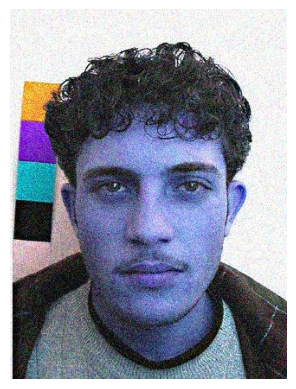

In [77]:
import matplotlib.pyplot as plt

# Obtén la matriz de píxeles de la imagen
matriz_pixeles = imagenes[230]

# Mostrar la imagen
plt.imshow(matriz_pixeles)
plt.axis('off')  # Eliminar ejes
plt.show()

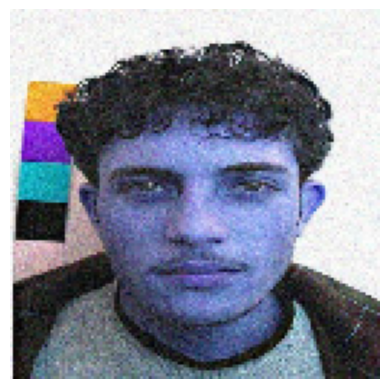

In [78]:
import matplotlib.pyplot as plt

# Obtén la matriz de píxeles de la imagen
matriz_pixeles = resized_images[230]

# Mostrar la imagen
plt.imshow(matriz_pixeles)
plt.axis('off')  # Eliminar ejes
plt.show()

In [79]:
data['label'] = np.where(data['with_mask'] == 1, 1, 0)

In [80]:
data.head()

,filename,with_mask,without_mask,label
0,26-with-mask_jpg.rf.fb2a4fd14461ba4e7d981f51d9...,1,0,1
1,66_jpg.rf.fb48333563aba0cd06afba343f625d98.jpg,0,1,0
2,153-with-mask_jpg.rf.fb584ce29ce6d9a3123a04d80...,1,0,1
3,29-with-mask_jpg.rf.fb9ecac8d3dc335a43b79a9438...,1,0,1
4,augmented_image_315_jpg.rf.fba9c25c6675c5a039f...,1,0,1


In [81]:
etiquetas_2=data[["with_mask","without_mask"]]
etiquetas_2

,with_mask,without_mask
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
1274,0,1
1275,0,1
1276,0,1
1277,1,0


#### Una imagen que es de 128x128, tendra en total 16,384 pixeles (cada cuadrito)

In [82]:
resized_images[0].shape

(128, 128, 3)

In [83]:
##Accedemos a un pixel de la imagen (cada pixel 8bits  (valores entre 0 - 255))
pixel = resized_images[128][127, 127]
pixel

array([129, 176, 198], dtype=uint8)

In [21]:
#resized_images

#### Construimos la Arquitectura de las CNN

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Paso 1: Preprocesamiento de datos
# Normalización de los valores de píxeles
resized_images = resized_images / 255.0

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(resized_images, etiquetas_2, test_size=0.2, random_state=42)

# Paso 2: Definición del modelo de la CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Paso 3: Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Paso 4: Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Paso 5: Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Paso 7: Predicciones
predictions = model.predict(X_test)

Epoch 1/10
32/32 [==============================] - 93s 3s/step - loss: 0.7610 - accuracy: 0.7302 - val_loss: 0.4239 - val_accuracy: 0.9141
Epoch 2/10
32/32 [==============================] - 89s 3s/step - loss: 0.2293 - accuracy: 0.9179 - val_loss: 0.1834 - val_accuracy: 0.9492
Epoch 3/10
32/32 [==============================] - 83s 3s/step - loss: 0.1126 - accuracy: 0.9599 - val_loss: 0.1515 - val_accuracy: 0.9492
Epoch 4/10
32/32 [==============================] - 86s 3s/step - loss: 0.0747 - accuracy: 0.9736 - val_loss: 0.1169 - val_accuracy: 0.9531
Epoch 5/10
32/32 [==============================] - 85s 3s/step - loss: 0.0431 - accuracy: 0.9883 - val_loss: 0.1284 - val_accuracy: 0.9648
Epoch 6/10
32/32 [==============================] - 87s 3s/step - loss: 0.0287 - accuracy: 0.9902 - val_loss: 0.2049 - val_accuracy: 0.9414
Epoch 7/10
32/32 [==============================] - 84s 3s/step - loss: 0.0266 - accuracy: 0.9941 - val_loss: 0.1556 - val_accuracy: 0.9727
Epoch 8/10
32/32 [==

In [50]:
# Guardar el modelo en un archivo
model.save('modelo_cnn_v2.h5')

# Cargar el modelo desde el archivo
#model_cargado = keras.models.load_model('ruta_del_archivo/modelo_cnn.h5')

C:\Users\braya\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
#model_cargado = keras.models.load_model('modelo_cnn.h5', compile=False)

In [23]:
#!pip install --upgrade tensorflow keras

#### Desplegamos el Modelo CNN en tiempo Real

In [63]:
#!pip install --upgrade tensorflow
!pip install --upgrade keras

In [62]:
import tensorflow as tf 
print(tf.__version__)

2.13.0


In [59]:
import cv2
import numpy as np
from tensorflow import tf

model = tf.keras.models.load_model('modelo_cnn_v2.h5')

ImportError: cannot import name 'tf' from 'tensorflow' (C:\Users\braya\anaconda3\lib\site-packages\tensorflow\__init__.py)

In [55]:
import cv2
import numpy as np
from tensorflow import keras

# Cargar el modelo entrenado
#model = keras.models.load_model('modelo_cnn_v2.h5')

# Capturar imágenes en tiempo real
cap = cv2.VideoCapture(0)

while True:
    # Leer un frame de la cámara
    ret, frame = cap.read()

    # Preprocesar el frame capturado
    frame_resized = cv2.resize(frame, (128, 128))
    input_image = frame_resized / 255.0
    input_image = np.expand_dims(input_image, axis=0)

    # Realizar la clasificación de la imagen
    predictions = model.predict(input_image)
    predicted_label = np.argmax(predictions)

    # Mostrar la clasificación en la pantalla
    if predicted_label == 0:
        label = 'Sin mascarilla'
    else:
        label = 'Con mascarilla'

    # Detección de rostros usando Haar Cascade
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Calcular las coordenadas para el cuadro centrado en el rostro
        cx = x + w // 2
        cy = y + h // 2
        size = max(w, h)  # Tamaño del cuadro basado en el lado más grande del rostro

        # Calcular las coordenadas del cuadro centrado
        x1 = cx - size // 2
        y1 = cy - size // 2
        x2 = x1 + size
        y2 = y1 + size

        # Dibujar el cuadro alrededor del rostro detectado
        frame_with_box = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame_with_box, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow('Clasificación en tiempo real', frame_with_box)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la cámara y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 32ms/step
